# Step 1 데이터 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)

# Step 2 데이터 탐색

In [2]:
print(df.head())
print('\n')
print(df.describe())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.50

# Step 3 데이터 전처리

In [3]:
X = df.iloc[:, :]
print(X[:5])
print('\n')

from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
print(X[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


# Step 4 K-means 군집 모형 - sklearn 사용

[2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 0 2 0 2 0 2 0 0 1 2 2 0 0 2 0 0 0 0 0 0 2 0
 2 2 0 0 0 2 2 2 2 2 1 2 2 0 0 2 2 0 0 1 2 0 0 2 1 2 2 0 1 0 2 0 0 0 0 0 2
 2 0 0 2 0 0 0 2 2 0 2 1 1 0 0 0 0 0 1 3 2 0 2 0 0 0 2 2 2 0 0 0 2 2 2 2 0
 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 2 2 0 2 2 2 0 0 2 2 2 2 0 0 0 2 2 0 2 0 2 0 0 0 0 0 3 0 3 0
 0 0 0 2 2 0 0 0 2 0 0 4 2 4 4 2 2 4 4 4 2 4 4 4 2 4 1 4 4 2 4 2 4 2 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 1 4 4 4 4 4 4 4
 4 4 4 4 4 2 4 2 4 2 4 4 4 4 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 2 4 2
 4 2 2 4 2 2 2 2 2 2 2 4 4 2 4 4 2 4 4 2 4 4 4 2 4 4 4 4 4 3 4 4 4 4 4 2 4
 1 4 2 4 4 4 4 2 2 0 2 0 0 2 2 0 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0
 2 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 2 2 0 0 0 0 0 0 2 2 0 2 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656    

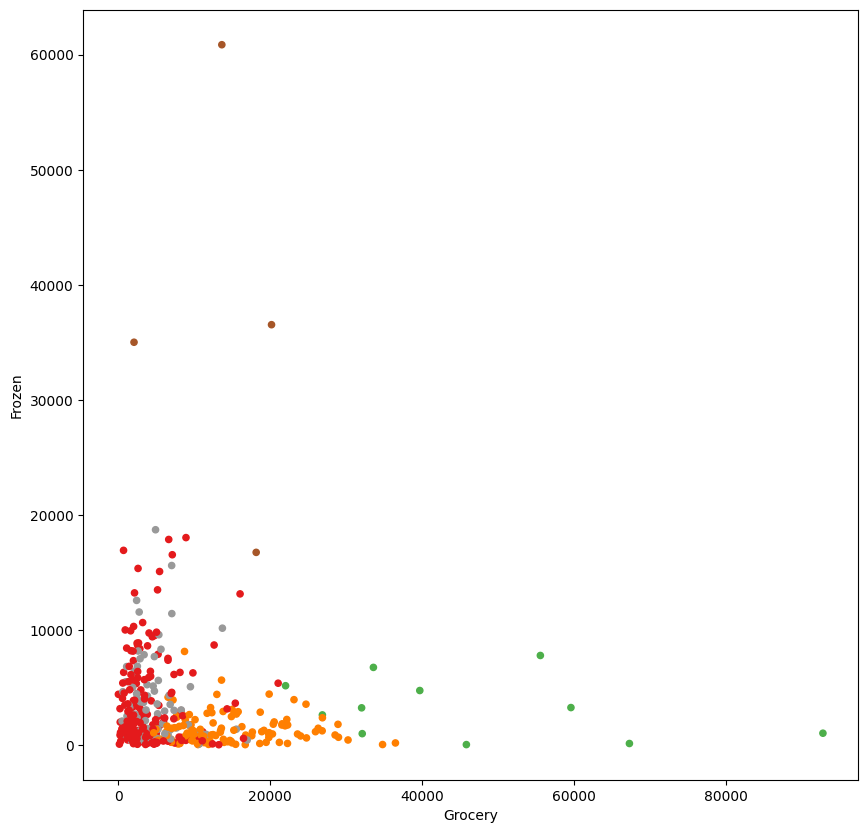

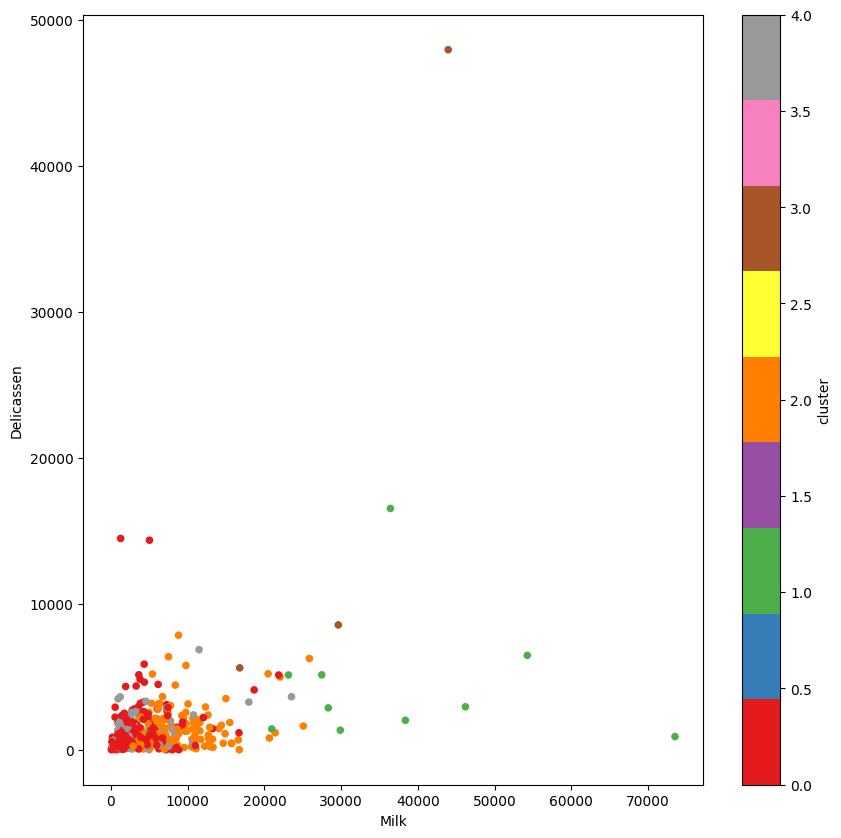

In [4]:
from sklearn import cluster

kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(X)

cluster_label = kmeans.labels_
print(cluster_label)
print('\n')

df['cluster'] = cluster_label
print(df.head())
print('\n')

# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

In [5]:
from sklearn.metrics import silhouette_score
silhouette_score(df.iloc[:,:-1], df.iloc[:,-1])

0.029706919511208477

In [6]:
# 모형 객체 생성 
kmeans4 = cluster.KMeans(init='k-means++', n_clusters=4, n_init=10)
# 모형 학습
kmeans4.fit(X)   
# 예측 (군집) 
cluster_label4 = kmeans4.labels_
df['Cluster4'] = cluster_label4
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  cluster  Cluster4  
0        1338        2         0  
1        1776        2         0  
2        7844        2         0  
3        1788        0         2  
4        5185        2         0  


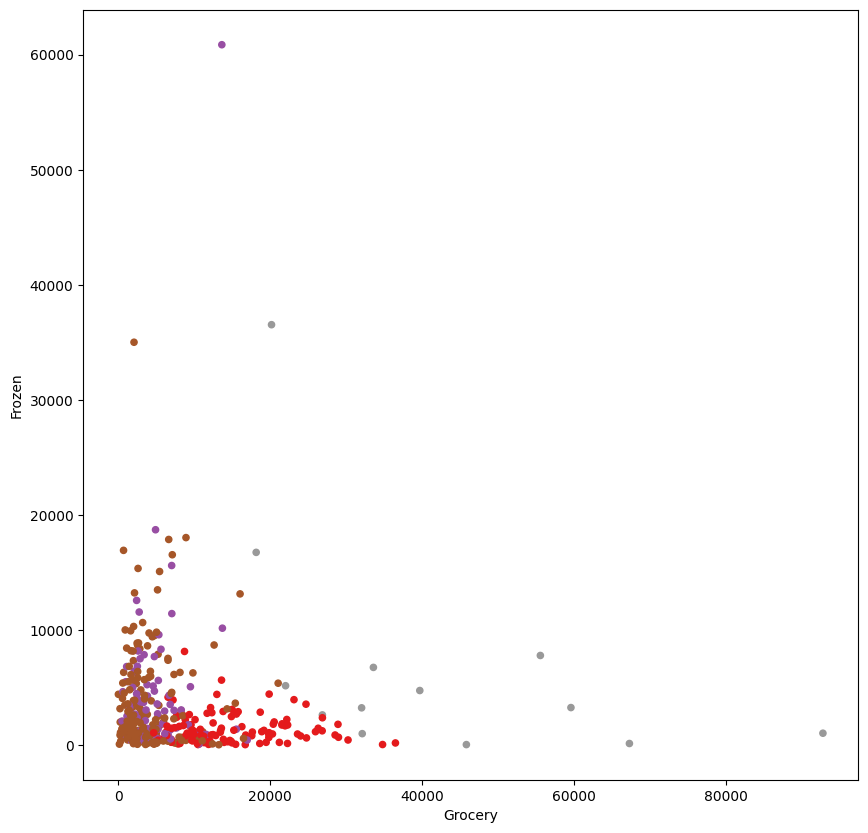

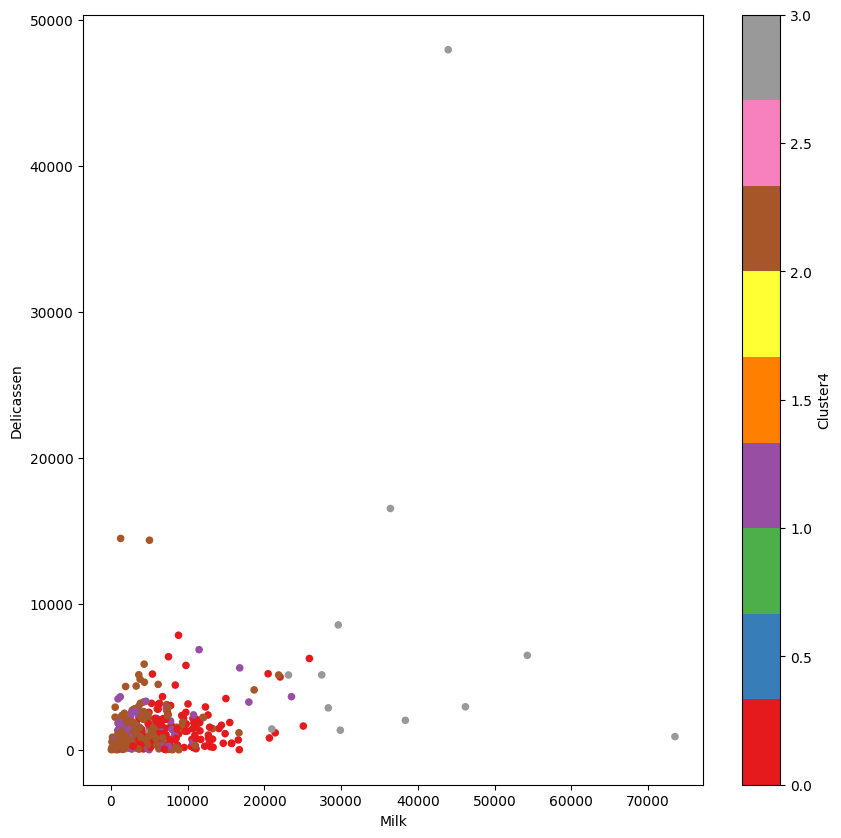

In [7]:
# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster4', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster4', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

In [8]:
silhouette_score(df.iloc[:,:-2], df.iloc[:,-1])

0.04136923754065599